In [1]:
import pandas as pd
import os

In [2]:
os.getcwd()

'/Users/akankshamishra/Downloads'

In [3]:
os.chdir("/Users/akankshamishra/Desktop/Hackathon/travel_insurance/")

In [4]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [5]:
train_df.head(25)

,ID,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,3433,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,7,MALAYSIA,0.0,17.82,NaN,31
1,4339,EPX,Travel Agency,Online,Cancellation Plan,0,85,SINGAPORE,69.0,0.00,NaN,36
2,34590,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,11,MALAYSIA,19.8,11.88,NaN,75
3,55816,EPX,Travel Agency,Online,2 way Comprehensive Plan,0,16,INDONESIA,20.0,0.00,NaN,32
4,13816,EPX,Travel Agency,Online,Cancellation Plan,0,10,"KOREA, REPUBLIC OF",15.0,0.00,NaN,29
5,50349,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,64,THAILAND,49.5,29.70,NaN,36
6,9921,JZI,Airlines,Online,Value Plan,0,23,JAPAN,-69.0,24.15,F,26
7,21923,JZI,Airlines,Online,Basic Plan,0,31,HONG KONG,26.0,9.10,M,60
8,2236,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,5,AUSTRALIA,19.8,11.88,NaN,57
9,14486,EPX,Travel Agency,Online,Cancellation Plan,0,100,INDONESIA,21.0,0.00,NaN,47


In [6]:
#creating copy of my train and validation dataset
train = train_df.copy()
test = test_df.copy()

In [12]:
print(train.isnull().sum())
train.shape

ID                          0
Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Claim                       0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  35953
Age                         0
dtype: int64


(50553, 12)

In [13]:
print(test.isnull().sum())
test.shape

ID                         0
Agency                     0
Agency Type                0
Distribution Channel       0
Product Name               0
Duration                   0
Destination                0
Net Sales                  0
Commision (in value)       0
Gender                  9056
Age                        0
dtype: int64


(12661, 11)

Gender columns has more than 70 percent null values in both train and test data, so i think, i is should drop it. because if i will replace it with third kind of gender such as unknown or not specified then it can affect the final prediction.

In [7]:
train.describe()

,ID,Claim,Duration,Net Sales,Commision (in value),Age
count,50553.000000,50553.000000,50553.000000,50553.000000,50553.00000,50553.000000
mean,31679.740134,0.014658,49.425969,40.800977,9.83809,40.011236
std,18288.265350,0.120180,101.434647,48.899683,19.91004,14.076566
min,0.000000,0.000000,-2.000000,-389.000000,0.00000,0.000000
25%,15891.000000,0.000000,9.000000,18.000000,0.00000,35.000000
50%,31657.000000,0.000000,22.000000,26.500000,0.00000,36.000000
75%,47547.000000,0.000000,53.000000,48.000000,11.55000,44.000000
max,63325.000000,1.000000,4881.000000,810.000000,283.50000,118.000000


In [8]:
test.describe()

,ID,Duration,Net Sales,Commision (in value),Age
count,12661.000000,12661.000000,12661.000000,12661.000000,12661.000000
mean,31617.928916,48.924335,40.148315,9.716776,39.818656
std,18249.761839,103.529989,48.686831,19.401245,13.787062
min,7.000000,-1.000000,-357.500000,0.000000,1.000000
25%,15616.000000,9.000000,18.000000,0.000000,35.000000
50%,31760.000000,22.000000,26.500000,0.000000,36.000000
75%,47289.000000,52.000000,47.000000,11.550000,43.000000
max,63322.000000,4847.000000,586.000000,210.210000,118.000000


In [16]:
train.drop(["ID", "Gender"],1 , inplace = True)
test.drop(["ID", "Gender"],1 , inplace = True)

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'relationship between claim and age')

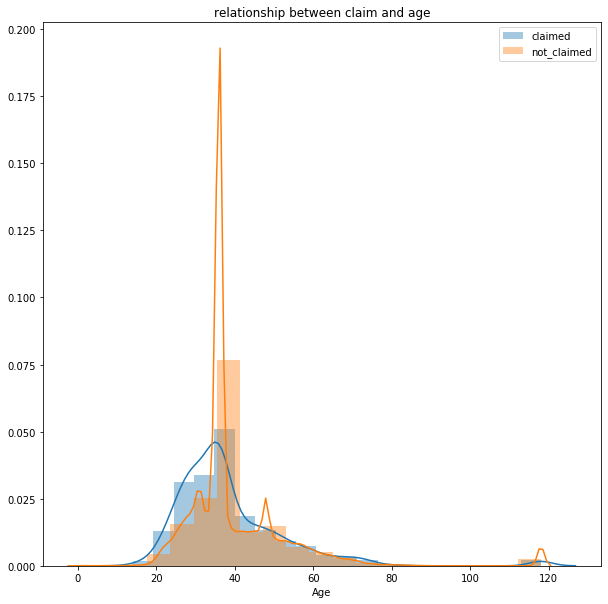

In [18]:
fig, axes = plt.subplots(figsize=(10, 10))

ax = sns.distplot(train[train['Claim']==1].Age.dropna(), bins=20, label = "claimed", ax = axes, kde =True)
ax = sns.distplot(train[train['Claim']==0].Age.dropna(), bins=20, label = "not_claimed", ax = axes, kde =True)
ax.legend()
ax.set_title('relationship between claim and age')

Observation: we can see that some people have age between 110 to 120 and some of them also have claimed insurance which is next to impossible. so we consider them as outlier. will handle them later on. let's check all other numerical features first.

Text(0.5, 1.0, 'relationship between claim and duration')

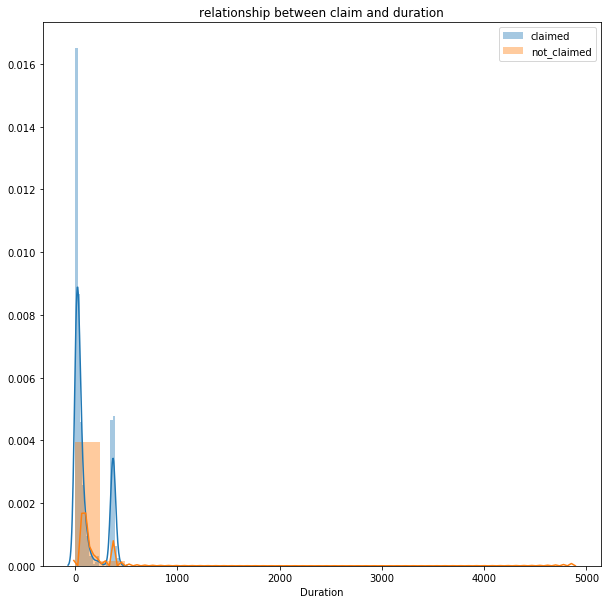

In [19]:
fig, axes = plt.subplots(figsize=(10, 10))

ax = sns.distplot(train[train['Claim']==1]["Duration"].dropna(), bins=20, label = "claimed", ax = axes, kde =True)
ax = sns.distplot(train[train['Claim']==0]["Duration"].dropna(), bins=20, label = "not_claimed", ax = axes, kde =True)
ax.legend()
ax.set_title('relationship between claim and duration')

Observation: We can see that we have some negative values in Duration column which is practically impossible and also our distribution is highly rightly skewed it means we have some outliers too. wil handle negative values and outliers both after analyzing rest of the numerical features.

Text(0.5, 1.0, 'relationship between claim and net sales')

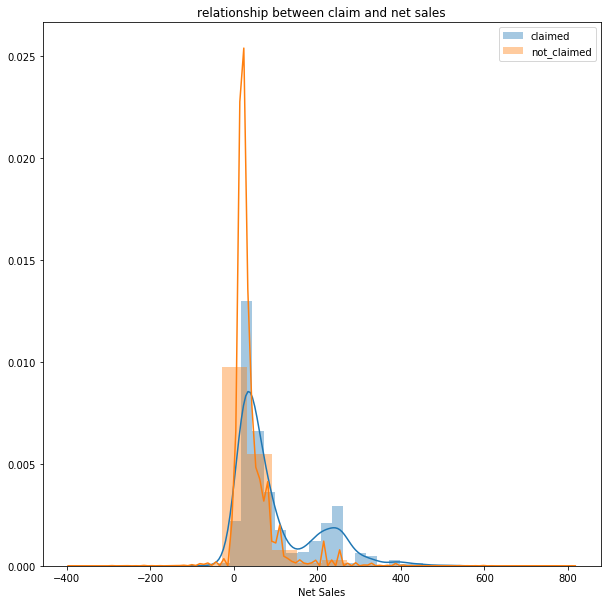

In [20]:
fig, axes = plt.subplots(figsize=(10, 10))

ax = sns.distplot(train[train['Claim']==1]["Net Sales"].dropna(), bins=20, label = "claimed", ax = axes, kde =True)
ax = sns.distplot(train[train['Claim']==0]["Net Sales"].dropna(), bins=20, label = "not_claimed", ax = axes, kde =True)
ax.legend()
ax.set_title('relationship between claim and net sales')

Observation: Again this distribution is also skewed and has some negative value and we know that Net Sales can never be negative.

Text(0.5, 1.0, 'relationship between claim and commission')

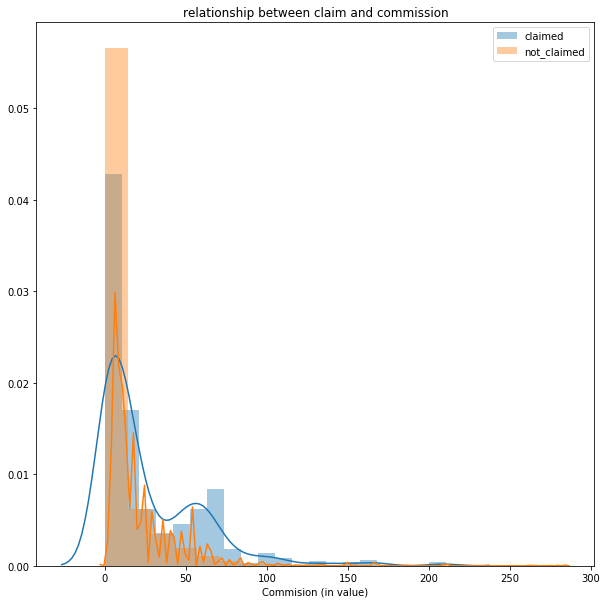

In [21]:
fig, axes = plt.subplots(figsize=(10, 10))

ax = sns.distplot(train[train['Claim']==1]["Commision (in value)"].dropna(), bins=20, label = "claimed", ax = axes, kde =True)
ax = sns.distplot(train[train['Claim']==0]["Commision (in value)"].dropna(), bins=20, label = "not_claimed", ax = axes, kde =True)
ax.legend()
ax.set_title('relationship between claim and commission')

Observation: Commision in value is also highly rightly skewed.

Net Sales and Commison: These both column seems to related but the graph plot shows disparency as low net sales shows high commison which is not pratically possible.

# Handling Outliers and Negative Values:

In [22]:
#Taking absolute values of Net Sales and Duration from both train and validation dataset
train["Net Sales"] = abs(train["Net Sales"])
train["Duration"] = abs(train["Duration"])
test["Net Sales"] = abs(test["Net Sales"])
test["Duration"] = abs(test["Duration"])

Replacing all outliers with mean+2*standard deviation to keep it into confidence interval.

In [23]:
train['Duration'] = train['Duration'].replace(train[train['Duration'] > 251 ]['Duration'] , 251)
train['Net Sales'] = train['Net Sales'].replace(train[train['Net Sales'] > 136 ]['Net Sales'] , 136)
train['Age'] = train['Age'].replace(118,80)
train["Commision (in value)"] = train["Commision (in value)"].replace(train[train["Commision (in value)"]>48]["Commision (in value)"],48)

# Visualization after handling outliers and Negative values

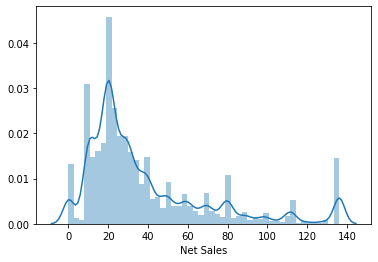

In [24]:
sns.distplot(train["Net Sales"],bins=50)

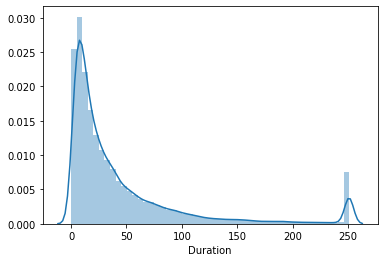

In [25]:
sns.distplot(train["Duration"],bins=50)

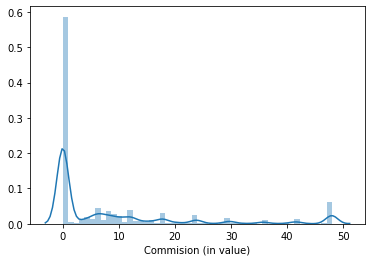

In [26]:
sns.distplot(train["Commision (in value)"],bins=50)

In [27]:
cat_cols = list(train.select_dtypes(exclude = "number"))
cat_cols

['Agency',
 'Agency Type',
 'Distribution Channel',
 'Product Name',
 'Destination']

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

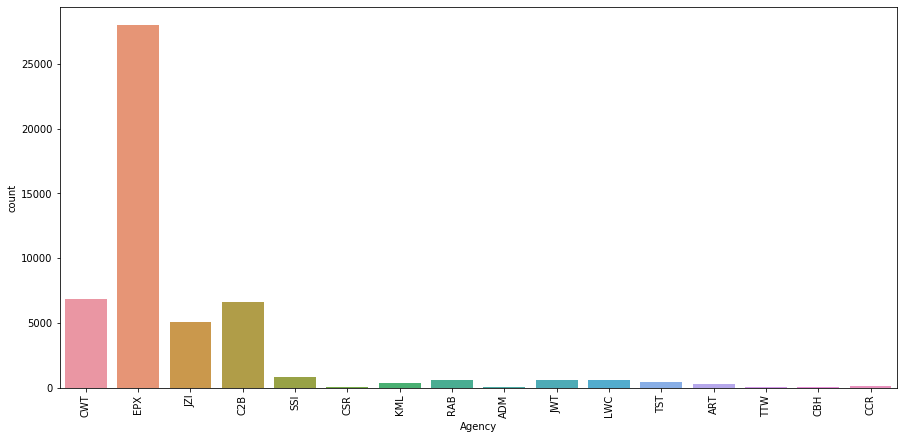

In [33]:
plt.figure(figsize=(15,7))
sns.countplot(train["Agency"])
plt.xticks(rotation = 90)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

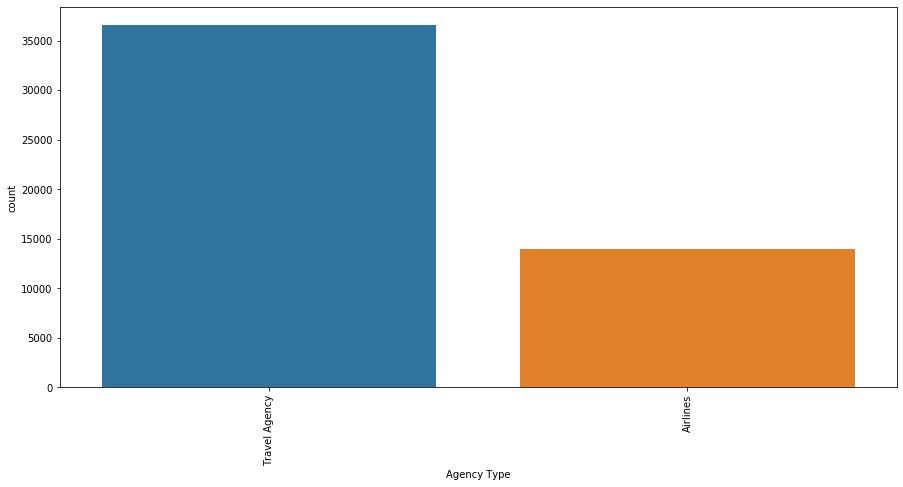

In [35]:
plt.figure(figsize=(15,7))
sns.countplot(train["Agency Type"])
plt.xticks(rotation = 90)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

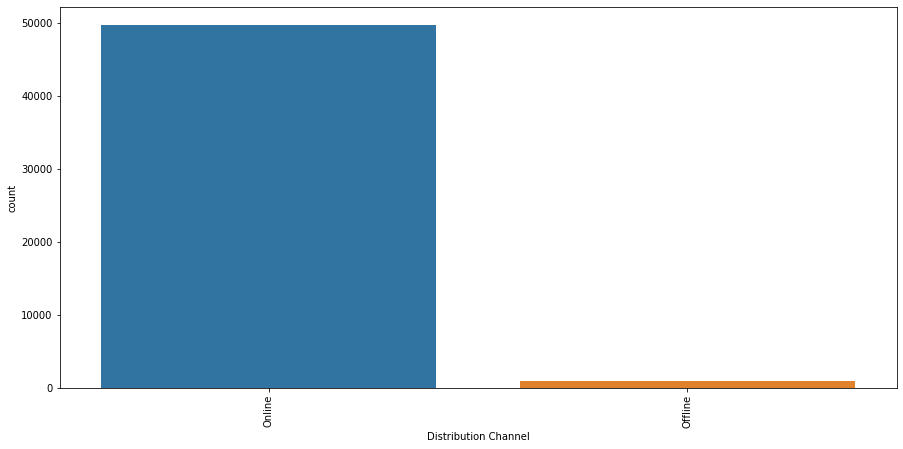

In [36]:
plt.figure(figsize=(15,7))
sns.countplot(train["Distribution Channel"])
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

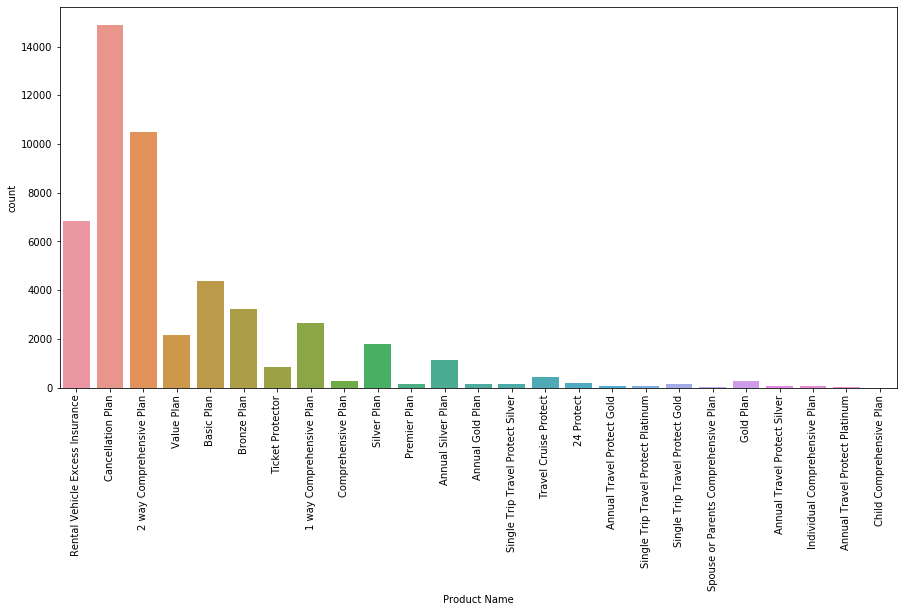

In [37]:
plt.figure(figsize=(15,7))
sns.countplot(train["Product Name"])
plt.xticks(rotation = 90)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101]),
 <a list of 102 Text xticklabel objects>)

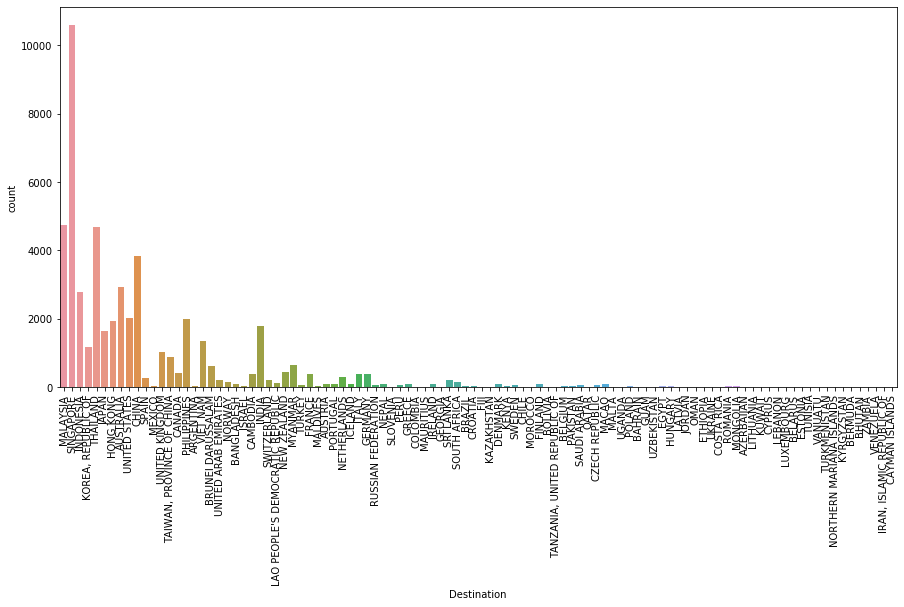

In [38]:
plt.figure(figsize=(15,7))
sns.countplot(train["Destination"])
plt.xticks(rotation = 90)

Observation: Visualization shows us that Destination and Product Name columns have many categories so i will do one hot encoding in these two and will do label encoding for rest of them.

# Label_encoding

In [39]:
from sklearn.preprocessing import LabelEncoder

In [40]:
col_le = ['Agency','Agency Type','Distribution Channel']

In [41]:
le = LabelEncoder()
for i in list(col_le):
    train[i] = le.fit_transform(train[i])
    test[i] = le.fit_transform(test[i])

# One Hot Encoding:

In [42]:
cat_train = train[["Product Name","Destination"]]
cat_test = test[["Product Name","Destination"]]

In [43]:
#using pandas get_dummies 
dummy_train = pd.get_dummies(cat_train)
dummy_test = pd.get_dummies(cat_test)
train_f = pd.concat([train,dummy_train],1)
test_f = pd.concat([test,dummy_test],1)

In [44]:
#Dropping all existing Categorical columns
train_f.drop(list(cat_train),1,inplace = True)
test_f.drop(list(cat_test),1,inplace = True)

In [45]:
train_f.head()

,Agency,Agency Type,Distribution Channel,Claim,Duration,Net Sales,Commision (in value),Age,Product Name_1 way Comprehensive Plan,Product Name_2 way Comprehensive Plan,...,Destination_UGANDA,Destination_UKRAINE,Destination_UNITED ARAB EMIRATES,Destination_UNITED KINGDOM,Destination_UNITED STATES,Destination_UZBEKISTAN,Destination_VANUATU,Destination_VENEZUELA,Destination_VIET NAM,Destination_ZAMBIA
0,6,1,1,0,7,0.0,17.82,31,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,1,1,0,85,69.0,0.00,36,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,1,1,0,11,19.8,11.88,75,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7,1,1,0,16,20.0,0.00,32,0,1,...,0,0,0,0,0,0,0,0,0,0
4,7,1,1,0,10,15.0,0.00,29,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
train_f.dtypes

Agency                                                 int64
Agency Type                                            int64
Distribution Channel                                   int64
Claim                                                  int64
Duration                                               int64
Net Sales                                            float64
Commision (in value)                                 float64
Age                                                    int64
Product Name_1 way Comprehensive Plan                  uint8
Product Name_2 way Comprehensive Plan                  uint8
Product Name_24 Protect                                uint8
Product Name_Annual Gold Plan                          uint8
Product Name_Annual Silver Plan                        uint8
Product Name_Annual Travel Protect Gold                uint8
Product Name_Annual Travel Protect Platinum            uint8
Product Name_Annual Travel Protect Silver              uint8
Product Name_Basic Plan 

In [47]:
train_f["Claim"].value_counts()

0    49812
1      741
Name: Claim, dtype: int64

Data is highly imbalanced so will do oversamling using smote

In [48]:
X = train_f.drop(["Claim"],1)
y = train_f["Claim"]

In [49]:

from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


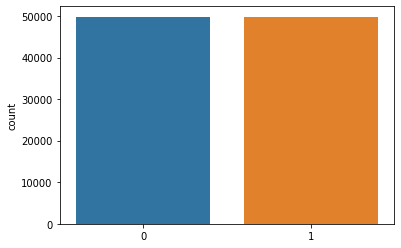

In [50]:
smote = SMOTE()
X_sample,y_sample = smote.fit_sample(X,y)
X_sample = pd.DataFrame(X_sample, columns=X.columns)
sns.countplot(y_sample)

In [51]:
from sklearn.model_selection import train_test_split as tts
import numpy as np

In [52]:
from sklearn.metrics import confusion_matrix, f1_score,  classification_report, recall_score, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [54]:
X_train,X_test,y_train,y_test = tts(X_sample,y_sample,random_state=42,test_size = 0.25)

# Stochastic Gradient Descent (SGD):

In [55]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
sgd_score = sgd.score(X_train, y_train)
accuracy_sgd = sgd.score(X_test,y_test)
recall_sgd = recall_score(y_test,y_pred)
precision_sgd = precision_score(y_test,y_pred)
f1_sgd = f1_score(y_test,y_pred)
confusion_mat_sgd = confusion_matrix(y_test,y_pred)
class_repo_sgd = classification_report(y_test,y_pred)
print(accuracy_sgd)
print( recall_sgd)
print(precision_sgd)
print(f1_sgd)
print(confusion_mat_sgd)
print(class_repo_sgd)

0.712358467839075
0.8300322061191626
0.6710714750683505
0.7421351954502916
[[ 7433  5053]
 [ 2111 10309]]
              precision    recall  f1-score   support

           0       0.78      0.60      0.67     12486
           1       0.67      0.83      0.74     12420

    accuracy                           0.71     24906
   macro avg       0.72      0.71      0.71     24906
weighted avg       0.73      0.71      0.71     24906



# Random Forest

In [56]:
rf = RandomForestClassifier(n_estimators=200)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_rf = rf.score(X_test,y_test)
recall_rf = recall_score(y_test,y_pred)
precision_rf = precision_score(y_test,y_pred)
f1_rf = f1_score(y_test,y_pred)
confusion_mat_rf = confusion_matrix(y_test,y_pred)
class_repo_rf = classification_report(y_test,y_pred)
print(accuracy_rf)
print( recall_rf)
print(precision_rf)
print(f1_rf)
print(confusion_mat_rf)
print(class_repo_rf)

0.9826146310126074
0.9859098228663447
0.9793649524114213
0.9826264895879309
[[12228   258]
 [  175 12245]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98     12486
           1       0.98      0.99      0.98     12420

    accuracy                           0.98     24906
   macro avg       0.98      0.98      0.98     24906
weighted avg       0.98      0.98      0.98     24906



# Logistic Regression:

In [57]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
lr_score = lr.score(X_train, y_train)
accuracy_lr = lr.score(X_test,y_test)
recall_lr = recall_score(y_test,y_pred)
precision_lr = precision_score(y_test,y_pred)
f1_lr = f1_score(y_test,y_pred)
confusion_mat_lr = confusion_matrix(y_test,y_pred)
class_repo_lr = classification_report(y_test,y_pred)
print(accuracy_lr)
print( recall_lr)
print(precision_lr)
print(f1_lr)
print(confusion_mat_lr)
print(class_repo_lr)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7938649321448646
0.7789855072463768
0.8019728116710876
0.7903120405162556
[[10097  2389]
 [ 2745  9675]]
              precision    recall  f1-score   support

           0       0.79      0.81      0.80     12486
           1       0.80      0.78      0.79     12420

    accuracy                           0.79     24906
   macro avg       0.79      0.79      0.79     24906
weighted avg       0.79      0.79      0.79     24906



# K Nearest Neighbor:


In [58]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
accuracy_knn = knn.score(X_test,y_test)
recall_knn = recall_score(y_test,y_pred)
precision_knn = precision_score(y_test,y_pred)
f1_knn = f1_score(y_test,y_pred)
confusion_mat_knn = confusion_matrix(y_test,y_pred)
class_repo_knn = classification_report(y_test,y_pred)
print(accuracy_knn)
print( recall_knn)
print(precision_knn)
print(f1_knn)
print(confusion_mat_knn)
print(class_repo_knn)

0.9234722556813619
0.9863123993558777
0.8758758758758759
0.9278194349768991
[[10750  1736]
 [  170 12250]]
              precision    recall  f1-score   support

           0       0.98      0.86      0.92     12486
           1       0.88      0.99      0.93     12420

    accuracy                           0.92     24906
   macro avg       0.93      0.92      0.92     24906
weighted avg       0.93      0.92      0.92     24906



# Gaussian Naive Bayes:

In [59]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
accuracy_gnb = gnb.score(X_test,y_test)
recall_gnb = recall_score(y_test,y_pred)
precision_gnb = precision_score(y_test,y_pred)
f1_gnb = f1_score(y_test,y_pred)
confusion_mat_gnb = confusion_matrix(y_test,y_pred)
class_repo_gnb = classification_report(y_test,y_pred)
print(accuracy_gnb)
print( recall_gnb)
print(precision_gnb)
print(f1_gnb)
print(confusion_mat_gnb)
print(class_repo_gnb)

0.5535212398618806
0.992109500805153
0.5278444139821796
0.6890728106475786
[[ 1464 11022]
 [   98 12322]]
              precision    recall  f1-score   support

           0       0.94      0.12      0.21     12486
           1       0.53      0.99      0.69     12420

    accuracy                           0.55     24906
   macro avg       0.73      0.55      0.45     24906
weighted avg       0.73      0.55      0.45     24906



# Perceptron:

In [60]:
p = Perceptron(max_iter=5)
p.fit(X_train,y_train)
y_pred = p.predict(X_test)
accuracy_p = p.score(X_test,y_test)
recall_p = recall_score(y_test,y_pred)
precision_p = precision_score(y_test,y_pred)
f1_p = f1_score(y_test,y_pred)
confusion_mat_p = confusion_matrix(y_test,y_pred)
class_repo_p = classification_report(y_test,y_pred)
print(accuracy_p)
print( recall_p)
print(precision_p)
print(f1_p)
print(confusion_mat_p)
print(class_repo_p)

0.7364891993897053
0.6466988727858293
0.7869109434701675
0.7099482918637027
[[10311  2175]
 [ 4388  8032]]
              precision    recall  f1-score   support

           0       0.70      0.83      0.76     12486
           1       0.79      0.65      0.71     12420

    accuracy                           0.74     24906
   macro avg       0.74      0.74      0.73     24906
weighted avg       0.74      0.74      0.73     24906



//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


# Linear Support Vector Machine:

In [61]:
svm = LinearSVC()
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)
accuracy_svm = svm.score(X_test,y_test)
recall_svm = recall_score(y_test,y_pred)
precision_svm = precision_score(y_test,y_pred)
f1_svm = f1_score(y_test,y_pred)
confusion_mat_svm = confusion_matrix(y_test,y_pred)
class_repo_svm = classification_report(y_test,y_pred)
print(accuracy_svm)
print( recall_svm)
print(precision_svm)
print(f1_svm)
print(confusion_mat_svm)
print(class_repo_svm)

0.7356058781016622
0.6577294685990338
0.7777777777777778
0.7127339353487763
[[10152  2334]
 [ 4251  8169]]
              precision    recall  f1-score   support

           0       0.70      0.81      0.76     12486
           1       0.78      0.66      0.71     12420

    accuracy                           0.74     24906
   macro avg       0.74      0.74      0.73     24906
weighted avg       0.74      0.74      0.73     24906



//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


# Decision Tree

In [62]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
accuracy_dt = dt.score(X_test,y_test)
recall_dt = recall_score(y_test,y_pred)
precision_dt = precision_score(y_test,y_pred)
f1_dt = f1_score(y_test,y_pred)
confusion_mat_dt = confusion_matrix(y_test,y_pred)
class_repo_dt = classification_report(y_test,y_pred)
print(accuracy_dt)
print( recall_dt)
print(precision_dt)
print(f1_dt)
print(confusion_mat_dt)
print(class_repo_dt)

0.9747450413554967
0.9818840579710145
0.9679339630129375
0.9748591070786203
[[12082   404]
 [  225 12195]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     12486
           1       0.97      0.98      0.97     12420

    accuracy                           0.97     24906
   macro avg       0.97      0.97      0.97     24906
weighted avg       0.97      0.97      0.97     24906



# XG Boost

In [64]:
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

In [65]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
accuracy_xgb = xgb.score(X_test,y_test)
recall_xgb = recall_score(y_test,y_pred)
precision_xgb = precision_score(y_test,y_pred)
f1_xgb = f1_score(y_test,y_pred)
confusion_mat_xgb = confusion_matrix(y_test,y_pred)
class_repo_xgb = classification_report(y_test,y_pred)
print(accuracy_xgb)
print( recall_xgb)
print(precision_xgb)
print(f1_xgb)
print(confusion_mat_xgb)
print(class_repo_xgb)

0.9113868144222276
0.9473429951690822
0.8833996546287258
0.914254633047127
[[10933  1553]
 [  654 11766]]
              precision    recall  f1-score   support

           0       0.94      0.88      0.91     12486
           1       0.88      0.95      0.91     12420

    accuracy                           0.91     24906
   macro avg       0.91      0.91      0.91     24906
weighted avg       0.91      0.91      0.91     24906



# AdaBoost Classifier

In [68]:
adb = AdaBoostClassifier()
adb.fit(X_train,y_train)
y_pred = adb.predict(X_test)
accuracy_adb = adb.score(X_test,y_test)
recall_adb = recall_score(y_test,y_pred)
precision_adb = precision_score(y_test,y_pred)
f1_adb = f1_score(y_test,y_pred)
confusion_mat_adb = confusion_matrix(y_test,y_pred)
class_repo_adb = classification_report(y_test,y_pred)
print(accuracy_adb)
print( recall_adb)
print(precision_adb)
print(f1_adb)
print(confusion_mat_adb)
print(class_repo_adb)


0.8881795551272785
0.9109500805152979
0.8707765720003079
0.8904104198638492
[[10807  1679]
 [ 1106 11314]]
              precision    recall  f1-score   support

           0       0.91      0.87      0.89     12486
           1       0.87      0.91      0.89     12420

    accuracy                           0.89     24906
   macro avg       0.89      0.89      0.89     24906
weighted avg       0.89      0.89      0.89     24906



# Which is the best Model ?

In [69]:
acc_df = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree',"XGBoost","AdaBoost"],
    'Score': [precision_svm, precision_knn, precision_lr, 
              precision_rf, precision_gnb, precision_p, 
              precision_sgd, precision_dt,precision_xgb,precision_adb]})
acc_df = acc_df.sort_values(by='Score', ascending=False)
acc_df = acc_df.set_index('Score')
acc_df

,Model
Score,
0.979365,Random Forest
0.967934,Decision Tree
0.883400,XGBoost
0.875876,KNN
0.870777,AdaBoost
0.801973,Logistic Regression
0.786911,Perceptron
0.777778,Support Vector Machines
0.671071,Stochastic Gradient Decent


# Converting all predictions into csv files 

In [76]:
pred_rf = rf.predict(test_f)
result = pd.DataFrame(dict(zip(test_df["ID"],pred_rf)).items(), columns = ["ID", "Claim"])
result.to_csv("/Users/akankshamishra/Desktop/test_submission_new/result_rf.csv", index= False)

In [77]:
pred_knn = knn.predict(test_f)
result = pd.DataFrame(dict(zip(test_df["ID"],pred_knn)).items(), columns = ["ID", "Claim"])
result.to_csv("/Users/akankshamishra/Desktop/test_submission_new/result_knn.csv", index= False)

In [86]:
pred_dt = dt.predict(test_f)
result = pd.DataFrame(dict(zip(test_df["ID"],pred_dt)).items(), columns = ["ID", "Claim"])
result.to_csv("/Users/akankshamishra/Desktop/test_submission_new/result_dt.csv", index= False)

In [79]:
pred_xgb = xgb.predict(test_f)
result = pd.DataFrame(dict(zip(test_df["ID"],pred_xgb)).items(), columns = ["ID", "Claim"])
result.to_csv("/Users/akankshamishra/Desktop/test_submission_new/result_xgb.csv", index= False)

In [80]:
pred_adb = adb.predict(test_f)
result = pd.DataFrame(dict(zip(test_df["ID"],pred_adb)).items(), columns = ["ID", "Claim"])
result.to_csv("/Users/akankshamishra/Desktop/test_submission_new/result_adb.csv", index= False)

In [81]:
pred_lr = lr.predict(test_f)
result = pd.DataFrame(dict(zip(test_df["ID"],pred_lr)).items(), columns = ["ID", "Claim"])
result.to_csv("/Users/akankshamishra/Desktop/test_submission_new/result_lr.csv", index= False)

In [82]:
pred_p = p.predict(test_f)
result = pd.DataFrame(dict(zip(test_df["ID"],pred_p)).items(), columns = ["ID", "Claim"])
result.to_csv("/Users/akankshamishra/Desktop/test_submission_new/result_p.csv", index= False)

In [83]:
pred_svm = svm.predict(test_f)
result = pd.DataFrame(dict(zip(test_df["ID"],pred_svm)).items(), columns = ["ID", "Claim"])
result.to_csv("/Users/akankshamishra/Desktop/test_submission_new/result_svm.csv", index= False)

In [84]:
pred_sgd = sgd.predict(test_f)
result = pd.DataFrame(dict(zip(test_df["ID"],pred_sgd)).items(), columns = ["ID", "Claim"])
result.to_csv("/Users/akankshamishra/Desktop/test_submission_new/result_sgd.csv", index= False)

In [85]:
pred_gnb = gnb.predict(test_f)
result = pd.DataFrame(dict(zip(test_df["ID"],pred_gnb)).items(), columns = ["ID", "Claim"])
result.to_csv("/Users/akankshamishra/Desktop/test_submission_new/result_gnb.csv", index= False)

now let's see how my acuuracy changes after doing some feature selection

# Feature selection by Random forest algorithm

In [87]:
rf = RandomForestClassifier(n_estimators=200)
rf.fit(X_train,y_train)
importances = pd.DataFrame({'feature':train_f.drop(["Claim"],1).columns,'importance':np.round(rf.feature_importances_,10)})
importances = importances.sort_values('importance',ascending=False)
importances

,feature,importance
4,Net Sales,9.582321e-02
3,Duration,8.955124e-02
6,Age,8.346059e-02
0,Agency,8.338651e-02
5,Commision (in value),8.189541e-02
111,Destination_SINGAPORE,7.088717e-02
17,Product Name_Cancellation Plan,6.316857e-02
1,Agency Type,5.103239e-02
16,Product Name_Bronze Plan,3.250572e-02
8,Product Name_2 way Comprehensive Plan,3.012340e-02


In [88]:
#taking top 100 features
rel_cols = list(importances.iloc[0:100,0])

In [91]:
X_new = X[rel_cols]
rel_test = test_f[rel_cols]

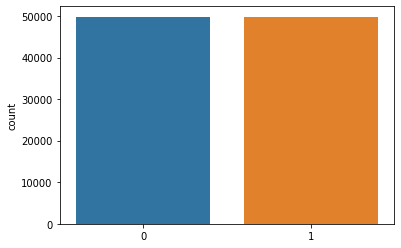

In [93]:
smote = SMOTE()
X_sample_n,y_sample_n = smote.fit_sample(X_new,y)
X_sample_n = pd.DataFrame(X_sample_n, columns=X_new.columns)
sns.countplot(y_sample_n)

In [94]:
X_train,X_test,y_train,y_test = tts(X_sample_n, y_sample_n , random_state=42,test_size = 0.25)

In [101]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
sgd_score = sgd.score(X_train, y_train)
accuracy_sgd_1 = sgd.score(X_test,y_test)
recall_sgd = recall_score(y_test,y_pred)
precision_sgd_1 = precision_score(y_test,y_pred)
f1_sgd = f1_score(y_test,y_pred)
confusion_mat_sgd = confusion_matrix(y_test,y_pred)
class_repo_sgd = classification_report(y_test,y_pred)
print(accuracy_sgd_1)
print( recall_sgd)
print(precision_sgd_1)
print(f1_sgd)
print(confusion_mat_sgd)
print(class_repo_sgd)

0.6186862603388742
0.980354267310789
0.5682019692939475
0.7194304115335757
[[ 3233  9253]
 [  244 12176]]
              precision    recall  f1-score   support

           0       0.93      0.26      0.41     12486
           1       0.57      0.98      0.72     12420

    accuracy                           0.62     24906
   macro avg       0.75      0.62      0.56     24906
weighted avg       0.75      0.62      0.56     24906



In [102]:
rf = RandomForestClassifier(n_estimators=200)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_rf_1 = rf.score(X_test,y_test)
recall_rf = recall_score(y_test,y_pred)
precision_rf_1 = precision_score(y_test,y_pred)
f1_rf = f1_score(y_test,y_pred)
confusion_mat_rf = confusion_matrix(y_test,y_pred)
class_repo_rf = classification_report(y_test,y_pred)
print(accuracy_rf_1)
print( recall_rf)
print(precision_rf_1)
print(f1_rf)
print(confusion_mat_rf)
print(class_repo_rf)

0.9832971974624588
0.987037037037037
0.9796228224388684
0.9833159541188738
[[12231   255]
 [  161 12259]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98     12486
           1       0.98      0.99      0.98     12420

    accuracy                           0.98     24906
   macro avg       0.98      0.98      0.98     24906
weighted avg       0.98      0.98      0.98     24906



In [103]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
lr_score = lr.score(X_train, y_train)
accuracy_lr_1 = lr.score(X_test,y_test)
recall_lr = recall_score(y_test,y_pred)
precision_lr_1 = precision_score(y_test,y_pred)
f1_lr = f1_score(y_test,y_pred)
confusion_mat_lr = confusion_matrix(y_test,y_pred)
class_repo_lr = classification_report(y_test,y_pred)
print(accuracy_lr_1)
print( recall_lr)
print(precision_lr_1)
print(f1_lr)
print(confusion_mat_lr)
print(class_repo_lr)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7920982895687786
0.7762479871175524
0.8007475083056479
0.7883074407195422
[[10087  2399]
 [ 2779  9641]]
              precision    recall  f1-score   support

           0       0.78      0.81      0.80     12486
           1       0.80      0.78      0.79     12420

    accuracy                           0.79     24906
   macro avg       0.79      0.79      0.79     24906
weighted avg       0.79      0.79      0.79     24906



In [104]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
accuracy_knn_1 = knn.score(X_test,y_test)
recall_knn = recall_score(y_test,y_pred)
precision_knn_1 = precision_score(y_test,y_pred)
f1_knn = f1_score(y_test,y_pred)
confusion_mat_knn = confusion_matrix(y_test,y_pred)
class_repo_knn = classification_report(y_test,y_pred)
print(accuracy_knn_1)
print( recall_knn)
print(precision_knn_1)
print(f1_knn)
print(confusion_mat_knn)
print(class_repo_knn)

0.9226692363285955
0.9805958132045088
0.878462204270052
0.9267234819662151
[[10801  1685]
 [  241 12179]]
              precision    recall  f1-score   support

           0       0.98      0.87      0.92     12486
           1       0.88      0.98      0.93     12420

    accuracy                           0.92     24906
   macro avg       0.93      0.92      0.92     24906
weighted avg       0.93      0.92      0.92     24906



In [105]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
accuracy_gnb_1 = gnb.score(X_test,y_test)
recall_gnb = recall_score(y_test,y_pred)
precision_gnb_1 = precision_score(y_test,y_pred)
f1_gnb = f1_score(y_test,y_pred)
confusion_mat_gnb = confusion_matrix(y_test,y_pred)
class_repo_gnb = classification_report(y_test,y_pred)
print(accuracy_gnb_1)
print( recall_gnb)
print(precision_gnb_1)
print(f1_gnb)
print(confusion_mat_gnb)
print(class_repo_gnb)

0.5830322010760459
0.980756843800322
0.5455726250727818
0.7011252770023311
[[ 2340 10146]
 [  239 12181]]
              precision    recall  f1-score   support

           0       0.91      0.19      0.31     12486
           1       0.55      0.98      0.70     12420

    accuracy                           0.58     24906
   macro avg       0.73      0.58      0.51     24906
weighted avg       0.73      0.58      0.51     24906



In [106]:
p = Perceptron(max_iter=5)
p.fit(X_train,y_train)
y_pred = p.predict(X_test)
accuracy_p_1 = p.score(X_test,y_test)
recall_p = recall_score(y_test,y_pred)
precision_p_1 = precision_score(y_test,y_pred)
f1_p = f1_score(y_test,y_pred)
confusion_mat_p = confusion_matrix(y_test,y_pred)
class_repo_p = classification_report(y_test,y_pred)
print(accuracy_p)
print( recall_p)
print(precision_p_1)
print(f1_p)
print(confusion_mat_p)
print(class_repo_p)

0.7364891993897053
0.864573268921095
0.6745398580312834
0.7578249056071138
[[ 7305  5181]
 [ 1682 10738]]
              precision    recall  f1-score   support

           0       0.81      0.59      0.68     12486
           1       0.67      0.86      0.76     12420

    accuracy                           0.72     24906
   macro avg       0.74      0.72      0.72     24906
weighted avg       0.74      0.72      0.72     24906



//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [107]:
svm = LinearSVC()
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)
accuracy_svm_1 = svm.score(X_test,y_test)
recall_svm = recall_score(y_test,y_pred)
precision_svm_1 = precision_score(y_test,y_pred)
f1_svm = f1_score(y_test,y_pred)
confusion_mat_svm = confusion_matrix(y_test,y_pred)
class_repo_svm = classification_report(y_test,y_pred)
print(accuracy_svm_1)
print( recall_svm)
print(precision_svm_1)
print(f1_svm)
print(confusion_mat_svm)
print(class_repo_svm)

0.7168152252469284
0.633816425120773
0.7586007516623302
0.6906171864719042
[[9981 2505]
 [4548 7872]]
              precision    recall  f1-score   support

           0       0.69      0.80      0.74     12486
           1       0.76      0.63      0.69     12420

    accuracy                           0.72     24906
   macro avg       0.72      0.72      0.71     24906
weighted avg       0.72      0.72      0.71     24906



//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [108]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
accuracy_dt_1 = dt.score(X_test,y_test)
recall_dt = recall_score(y_test,y_pred)
precision_dt_1 = precision_score(y_test,y_pred)
f1_dt = f1_score(y_test,y_pred)
confusion_mat_dt = confusion_matrix(y_test,y_pred)
class_repo_dt = classification_report(y_test,y_pred)
print(accuracy_dt_1)
print( recall_dt)
print(precision_dt_1)
print(f1_dt)
print(confusion_mat_dt)
print(class_repo_dt)

0.9768730426403276
0.9837359098228663
0.9702986022871665
0.9769710538941309
[[12112   374]
 [  202 12218]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98     12486
           1       0.97      0.98      0.98     12420

    accuracy                           0.98     24906
   macro avg       0.98      0.98      0.98     24906
weighted avg       0.98      0.98      0.98     24906



In [109]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
accuracy_xgb_1 = xgb.score(X_test,y_test)
recall_xgb = recall_score(y_test,y_pred)
precision_xgb_1 = precision_score(y_test,y_pred)
f1_xgb = f1_score(y_test,y_pred)
confusion_mat_xgb = confusion_matrix(y_test,y_pred)
class_repo_xgb = classification_report(y_test,y_pred)
print(accuracy_xgb)
print( recall_xgb)
print(precision_xgb_1)
print(f1_xgb)
print(confusion_mat_xgb)
print(class_repo_xgb)

0.9113868144222276
0.9457326892109501
0.8830251090061645
0.9133037866417854
[[10930  1556]
 [  674 11746]]
              precision    recall  f1-score   support

           0       0.94      0.88      0.91     12486
           1       0.88      0.95      0.91     12420

    accuracy                           0.91     24906
   macro avg       0.91      0.91      0.91     24906
weighted avg       0.91      0.91      0.91     24906



In [110]:
adb = AdaBoostClassifier()
adb.fit(X_train,y_train)
y_pred = adb.predict(X_test)
accuracy_adb_1 = adb.score(X_test,y_test)
recall_adb = recall_score(y_test,y_pred)
precision_adb_1 = precision_score(y_test,y_pred)
f1_adb = f1_score(y_test,y_pred)
confusion_mat_adb = confusion_matrix(y_test,y_pred)
class_repo_adb = classification_report(y_test,y_pred)
print(accuracy_adb)
print( recall_adb)
print(precision_adb)
print(f1_adb)
print(confusion_mat_adb)
print(class_repo_adb)

0.8881795551272785
0.9289049919484702
0.8707765720003079
0.8985552396900192
[[10764  1722]
 [  883 11537]]
              precision    recall  f1-score   support

           0       0.92      0.86      0.89     12486
           1       0.87      0.93      0.90     12420

    accuracy                           0.90     24906
   macro avg       0.90      0.90      0.90     24906
weighted avg       0.90      0.90      0.90     24906



In [112]:
pred_rf = rf.predict(rel_test)
result = pd.DataFrame(dict(zip(test_df["ID"],pred_rf)).items(), columns = ["ID", "Claim"])
result.to_csv("/Users/akankshamishra/Desktop/test_submission_new/result_rf_new.csv", index= False)

In [113]:
pred_knn = knn.predict(rel_test)
result = pd.DataFrame(dict(zip(test_df["ID"],pred_knn)).items(), columns = ["ID", "Claim"])
result.to_csv("/Users/akankshamishra/Desktop/test_submission_new/result_knn_new.csv", index= False)

In [114]:
pred_dt = dt.predict(rel_test)
result = pd.DataFrame(dict(zip(test_df["ID"],pred_dt)).items(), columns = ["ID", "Claim"])
result.to_csv("/Users/akankshamishra/Desktop/test_submission_new/result_dt_new.csv", index= False)

In [115]:
pred_xgb = xgb.predict(rel_test)
result = pd.DataFrame(dict(zip(test_df["ID"],pred_xgb)).items(), columns = ["ID", "Claim"])
result.to_csv("/Users/akankshamishra/Desktop/test_submission_new/result_xgb_new.csv", index= False)

In [116]:
pred_adb = adb.predict(rel_test)
result = pd.DataFrame(dict(zip(test_df["ID"],pred_adb)).items(), columns = ["ID", "Claim"])
result.to_csv("/Users/akankshamishra/Desktop/test_submission_new/result_adb_new.csv", index= False)

In [117]:
pred_lr = lr.predict(rel_test)
result = pd.DataFrame(dict(zip(test_df["ID"],pred_lr)).items(), columns = ["ID", "Claim"])
result.to_csv("/Users/akankshamishra/Desktop/test_submission_new/result_lr_new.csv", index= False)

In [118]:
pred_p = p.predict(rel_test)
result = pd.DataFrame(dict(zip(test_df["ID"],pred_p)).items(), columns = ["ID", "Claim"])
result.to_csv("/Users/akankshamishra/Desktop/test_submission_new/result_p_new.csv", index= False)

In [119]:
pred_svm = svm.predict(rel_test)
result = pd.DataFrame(dict(zip(test_df["ID"],pred_svm)).items(), columns = ["ID", "Claim"])
result.to_csv("/Users/akankshamishra/Desktop/test_submission_new/result_svm_new.csv", index= False)

In [120]:
pred_sgd = sgd.predict(rel_test)
result = pd.DataFrame(dict(zip(test_df["ID"],pred_sgd)).items(), columns = ["ID", "Claim"])
result.to_csv("/Users/akankshamishra/Desktop/test_submission_new/result_sgd_new.csv", index= False)

In [121]:
pred_gnb = gnb.predict(rel_test)
result = pd.DataFrame(dict(zip(test_df["ID"],pred_gnb)).items(), columns = ["ID", "Claim"])
result.to_csv("/Users/akankshamishra/Desktop/test_submission_new/result_gnb_new.csv", index= False)